In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import seaborn as sns

In [2]:
myfile = uproot.open( 'Skim4.root' )

In [3]:
tree = myfile['oniaTree']

In [4]:
tree.keys()

[b'event', b'dimuon_p4', b'muonP_p4', b'muonN_p4']

In [5]:
data = tree['dimuon_p4'].array() 

In [6]:
data

<ObjectArrayMethods [TLorentzVector(x=22.614, y=10.68, z=-30.315, t=43.803) TLorentzVector(x=-24.663, y=28.048, z=68.279, t=77.828) TLorentzVector(x=0.90503, y=-3.3181, z=68.011, t=107.17) ... TLorentzVector(x=5.8832, y=8.3591, z=-46.023, t=54.143) TLorentzVector(x=39.846, y=-23.877, z=100.73, t=143.03) TLorentzVector(x=-7.7948, y=-2.1713, z=-14.236, t=17.495)] at 0x7f143c53ad00>

In [7]:
lista_massa = []
lista_pt    = []
for i in range( 0 , data.size ):
    lista_massa.append( data[i].mass )    
    lista_pt.append( data[i].pt )    

In [8]:
lista_massa = np.array( lista_massa )
lista_pt = np.array( lista_pt )

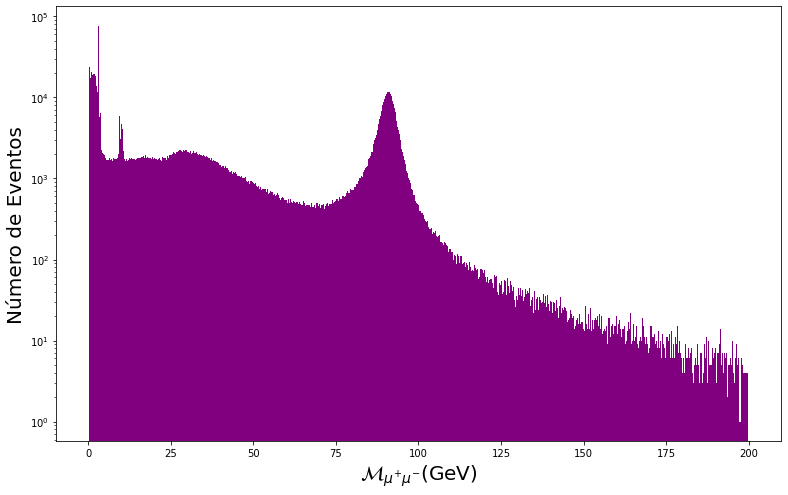

In [9]:
plt.figure(figsize=(13,8))
plt.hist( lista_massa , bins = 800 , color = 'purple')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,3), useMathText = True)
plt.xlabel(r'$\mathcal{M}_{\mu^{+}\mu^{-}}$(GeV)', fontsize = 20)
plt.ylabel('Número de Eventos',fontsize = 20)
plt.yscale( 'log' )
#plt.xscale( 'log' )
plt.show()

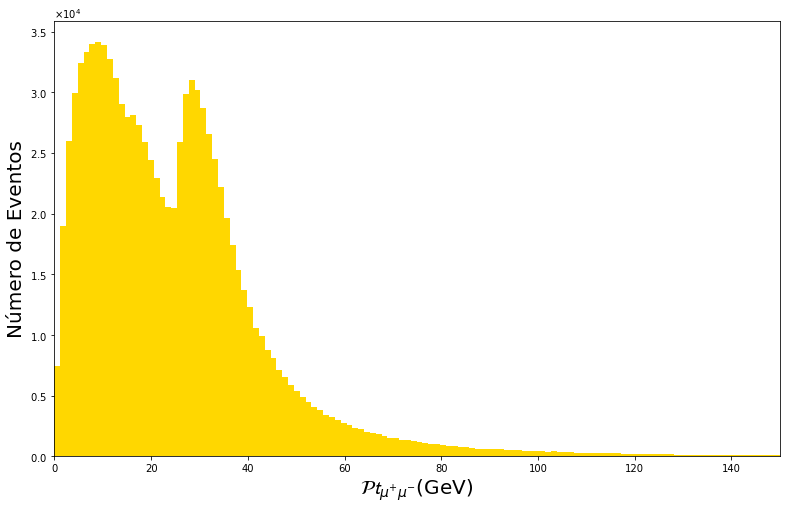

In [10]:
plt.figure(figsize=(13,8))
plt.hist( lista_pt , bins = 1000 , color = 'gold')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,3), useMathText = True)
plt.xlabel(r'$\mathcal{Pt}_{\mu^{+}\mu^{-}}$(GeV)', fontsize = 20)
plt.ylabel('Número de Eventos',fontsize = 20)
#plt.yscale( 'log' )
plt.xlim( 0,150 )
plt.show()

In [11]:
lista_massa_cut = (lista_massa < 11) & (lista_massa > 8)
lista_massa = lista_massa[lista_massa_cut]
print('lista das massas após o corte --> ' , lista_massa , '\n' , 'Quantidade de eventos -->' , lista_massa.size )

lista das massas após o corte -->  [ 9.43301678 10.05546284  9.89787865 ...  9.11357784  9.86500931
 10.49369431] 
 Quantidade de eventos --> 36420


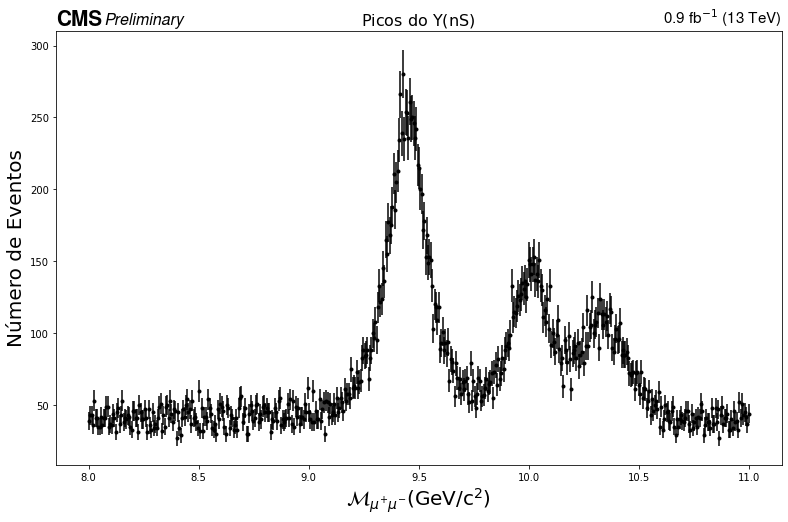

In [12]:
plt.figure(figsize=(13,8))
counts_1, bin_edges_1 = np.histogram( lista_massa , bins=np.linspace(8,11,500))
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='.', label = 'Data-2017', color = 'black')
plt.xlabel(r'$\mathcal{M}_{\mu^{+}\mu^{-}}$(GeV/c$^{2}$)', fontsize = 20)
plt.ylabel('Número de Eventos',fontsize = 20)
hep.cms.label(llabel="Preliminary", rlabel="0.9 fb$^{-1}$ (13 TeV)", fontsize = 16)
plt.title(r"Picos do $\Upsilon$(nS) " , fontsize = 16)
plt.show()

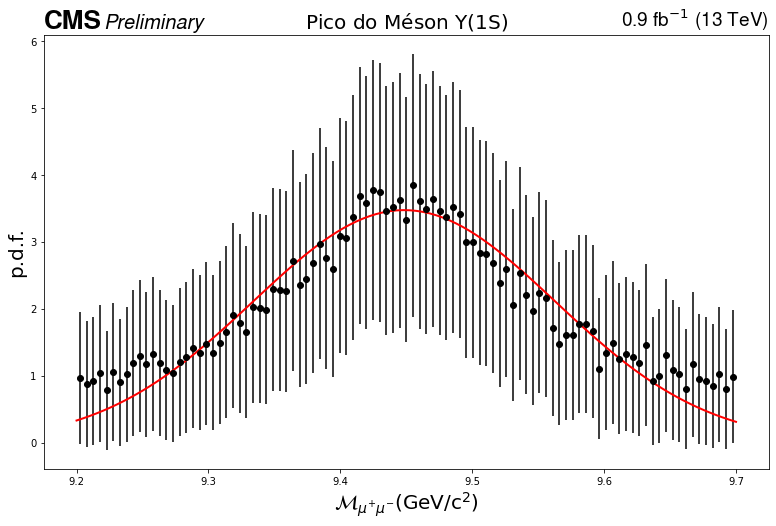

In [13]:
from scipy.stats import norm

lista_massa_cut = (lista_massa < 9.7) & (lista_massa > 9.2)
lista_massa = lista_massa[lista_massa_cut]
#media, std = norm.fit(lista_massa)
#plt.figure(figsize=(13,8))
#sns.distplot(lista_massa , bins = 500 , hist = True , rug = False , fit = norm )

mu, std = norm.fit(lista_massa)

# Plot the histogram.
plt.figure(figsize=(13,8))
counts_1, bin_edges_1 = np.histogram( lista_massa , bins=np.linspace(9.2,9.7,100) , density = True)
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o', label = 'Data-2017', color = 'black')

# Plot the PDF.
xmin, xmax = 9.2,9.7
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2 , color = 'red')
fit_result = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(r'Pico do Méson $\Upsilon$(1S)',fontsize = 20)
plt.xlabel(r'$\mathcal{M}_{\mu^{+}\mu^{-}}$(GeV/c$^{2}$)', fontsize = 20)
plt.ylabel('p.d.f.',fontsize = 20)
hep.cms.label(llabel="Preliminary", rlabel="0.9 fb$^{-1}$ (13 TeV)", fontsize = 20)
plt.show()

In [14]:
lista_pt_cut = (lista_pt < 100) & (lista_pt > 10)
lista_pt = lista_pt[lista_pt_cut]
print('lista dos Pt\'s após o corte --> ' , lista_pt , '\n' , 'Quantidade de eventos -->' , lista_pt.size)

lista dos Pt's após o corte -->  [25.00948715 37.34931946 12.30689526 ... 10.72324944 10.22187996
 46.45231247] 
 Quantidade de eventos --> 762505


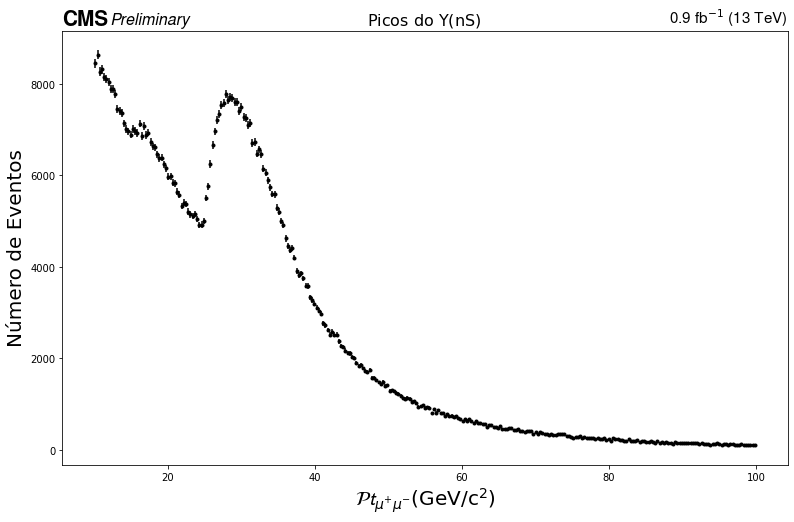

In [15]:
plt.figure(figsize=(13,8))
counts_1, bin_edges_1 = np.histogram( lista_pt , bins=np.linspace(10,100,300))
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='.', label = 'Data-2017', color = 'black')
plt.xlabel(r'$\mathcal{Pt}_{\mu^{+}\mu^{-}}$(GeV/c$^{2}$)', fontsize = 20)
plt.ylabel('Número de Eventos',fontsize = 20)
hep.cms.label(llabel="Preliminary", rlabel="0.9 fb$^{-1}$ (13 TeV)", fontsize = 16)
plt.title(r"Picos do $\Upsilon$(nS) " , fontsize = 16)
plt.show()